In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

** Read ds_Salaries as a dataframe called data.**

In [44]:
data = pd.read_csv("/content/drive/MyDrive/ds_salaries.csv")

** Check the head of the DataFrame. **

In [45]:
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


** Check the info of the DataFrame. **

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


** Find the missing data **

In [47]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

** Describe the data. **

In [48]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [49]:
num_of_raws = len(data)

** The relationship between experience level and salary in usd **

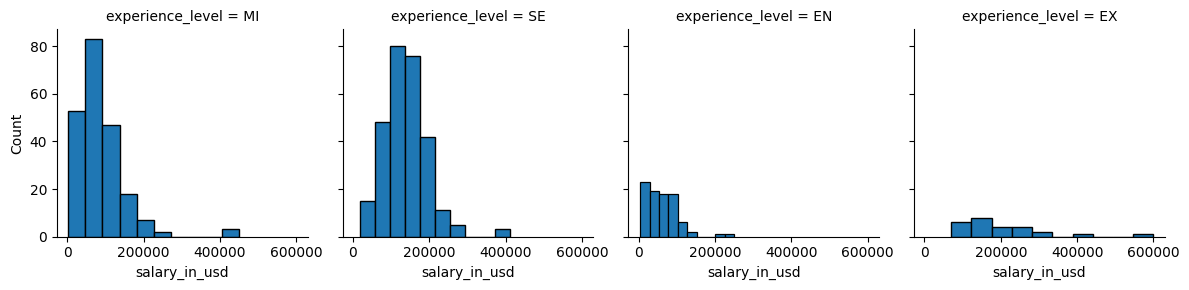

In [50]:
g = sns.FacetGrid(data, col = "experience_level")

g.map(sns.histplot, "salary_in_usd", alpha = 1,bins=10)

plt.show()

The executive level is the lowest in number of employees and highest salary

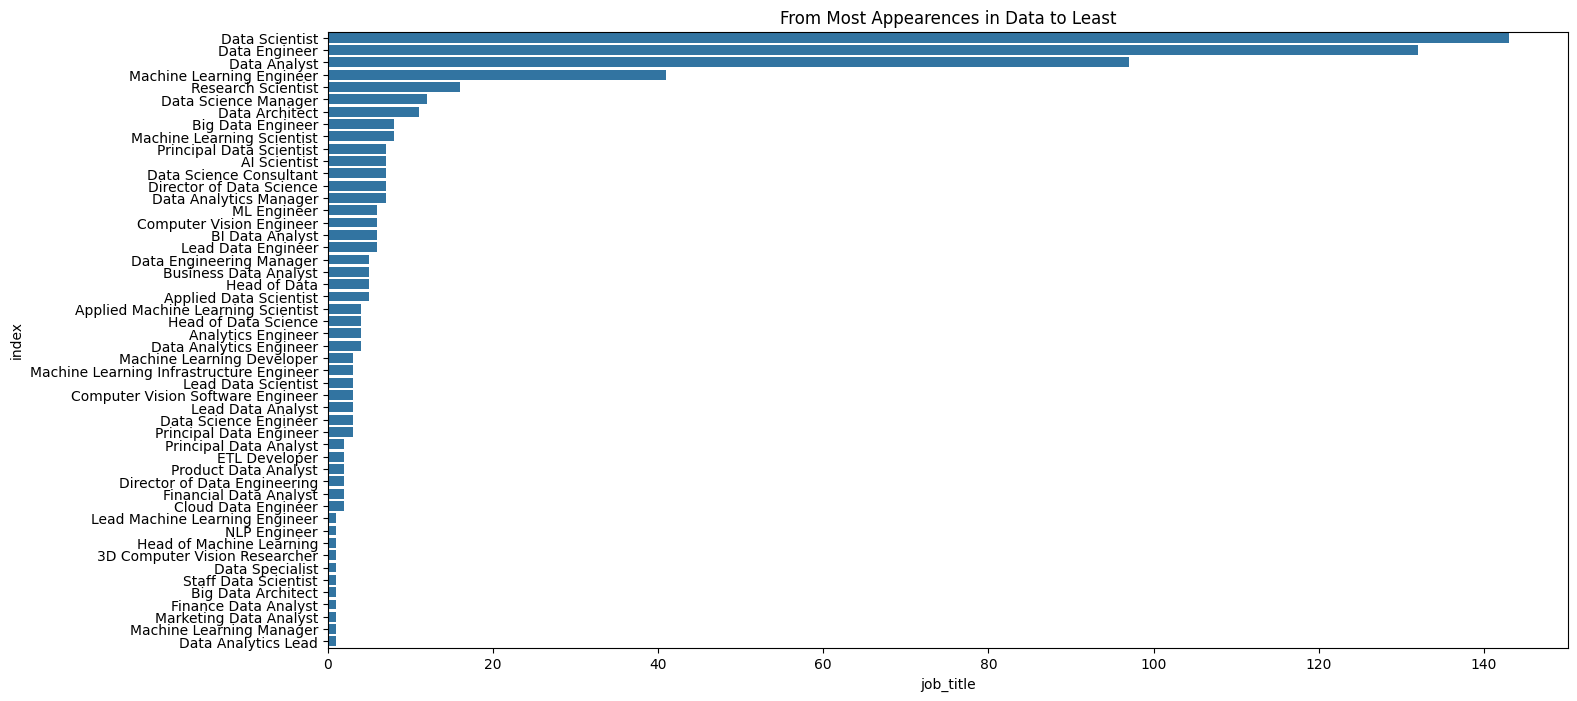

In [51]:
#Top 20 Jobs of Most Appearences in Data
df = data['job_title'].value_counts()[:].reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=df, y='index', x='job_title')
plt.title('From Most Appearences in Data to Least');

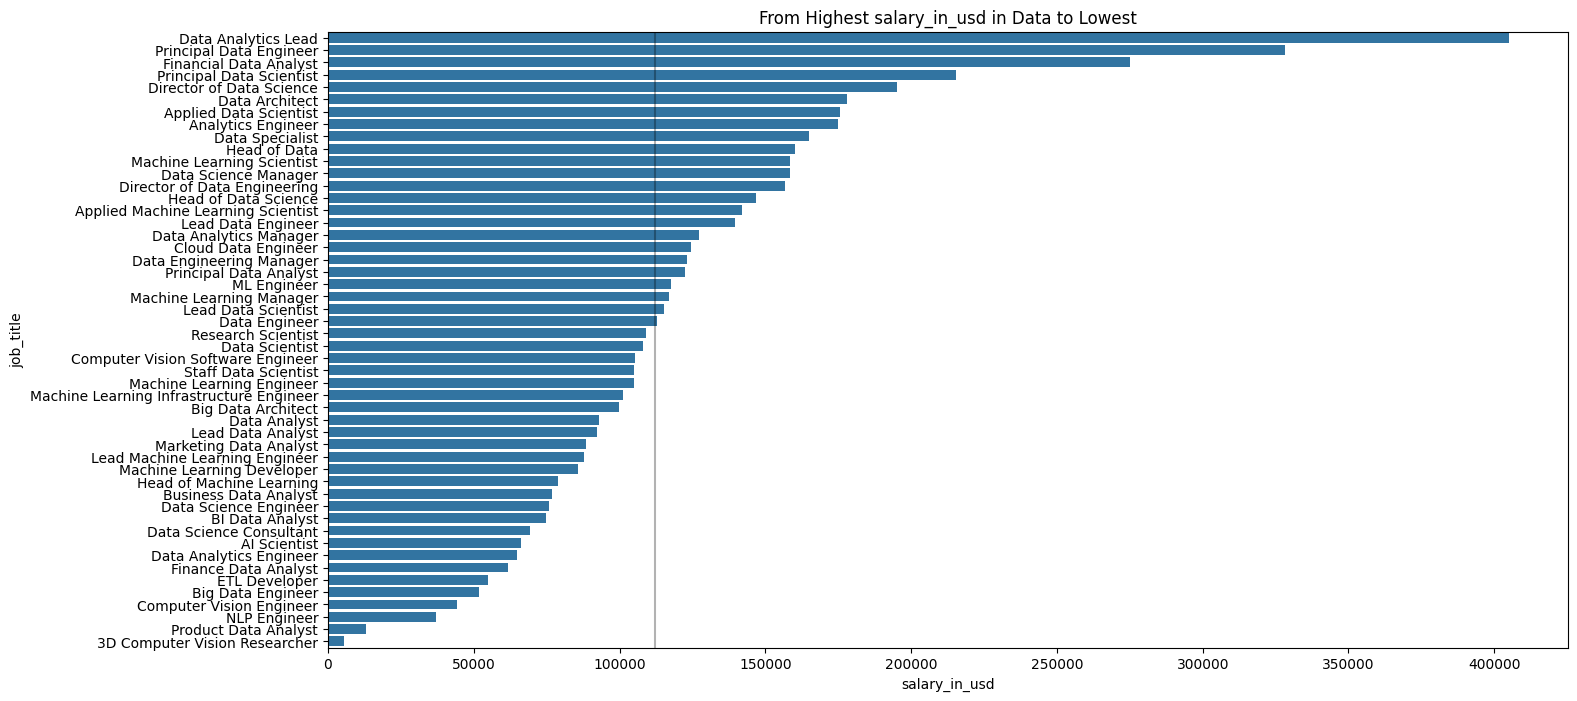

In [52]:
df = data.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)[:].reset_index()
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='salary_in_usd', y='job_title')
plt.title('From Highest salary_in_usd in Data to Lowest')
plt.axvline(data['salary_in_usd'].mean(), color='black', alpha=0.3)

In [53]:
data['experience_level'] = data['experience_level'].replace({
    'SE':'Senior',
    'MI':'Mid/Intermediate level',
    'EN':'Entry Level',
    'EX': 'Executive Level'
})
data.experience_level.unique()

array(['Mid/Intermediate level', 'Senior', 'Entry Level',
       'Executive Level'], dtype=object)

In [54]:
exp=data['experience_level'].value_counts()

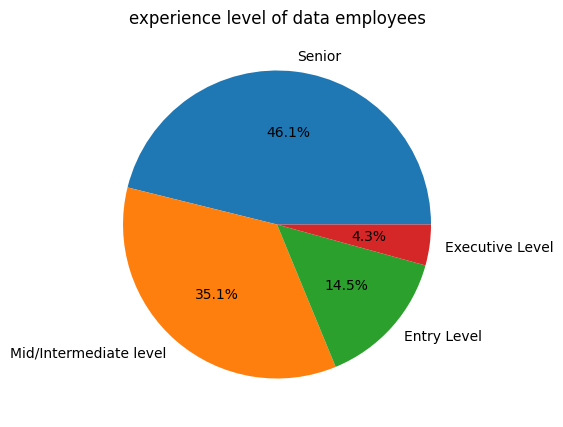

In [55]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('experience level of data employees')
ax.pie(exp, labels=exp.index, autopct='%1.1f%%')
plt.show()

In [56]:
data['employment_type'] = data['employment_type'].replace({
    'FT':'Full-Ti',
    'CT':'Contractor',
    'FL':'Freelancer',
    'PT':'Part_Time'
})
data.employment_type.unique()

array(['Full-Ti', 'Contractor', 'Part_Time', 'Freelancer'], dtype=object)

In [57]:
emp=data['employment_type'].value_counts()

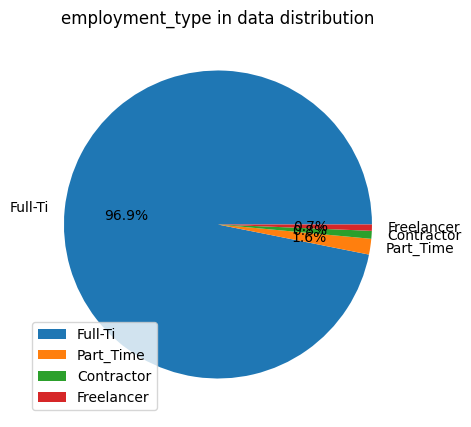

In [58]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('employment_type in data distribution')
ax.pie(emp, labels=emp.index, autopct='%1.1f%%')
plt.legend()
plt.show()

In [59]:
data['company_size'] = data['company_size'].replace({
    'L':'Large',
    'S':'Small',
    'M':'Medium'
})
data.company_size.unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [60]:
size=data['company_size'].value_counts()

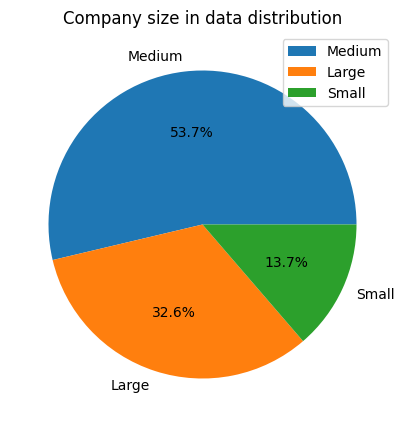

In [61]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Company size in data distribution')
ax.pie(size, labels=size.index, autopct='%1.1f%%')
plt.legend()
plt.show()

In [62]:
data.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [63]:
loc=data['company_location'].value_counts()

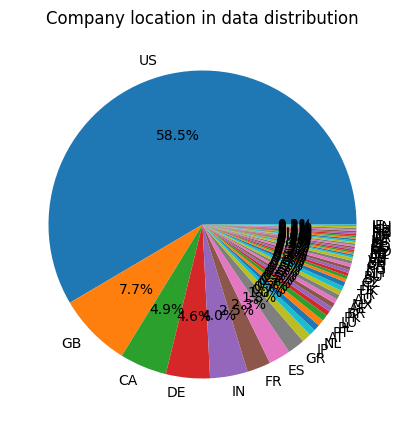

In [64]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Company location in data distribution')
ax.pie(loc, labels=loc.index, autopct='%1.1f%%')
plt.show()

Most of the companies are located in united states

In [65]:
data.remote_ratio.unique()

array([  0,  50, 100])

In [66]:
data['remote_ratio']=data['remote_ratio'].replace({
    0 : 'No remote',
    50 : 'Partially remote',
    100 : ' Fully remote'
})
data.remote_ratio.unique()

array(['No remote', 'Partially remote', ' Fully remote'], dtype=object)

In [67]:
rem=data['remote_ratio'].value_counts()

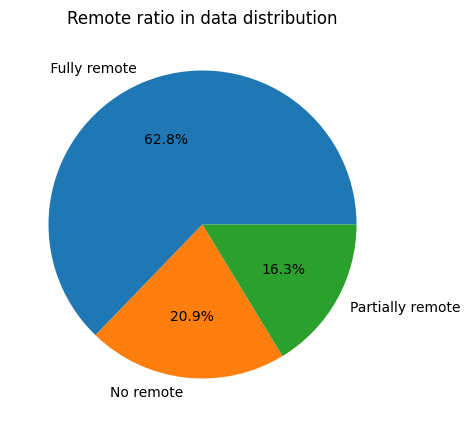

In [68]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Remote ratio in data distribution')
ax.pie(rem, labels=rem.index, autopct='%1.1f%%')
plt.show()

Most employees live far from the company's location

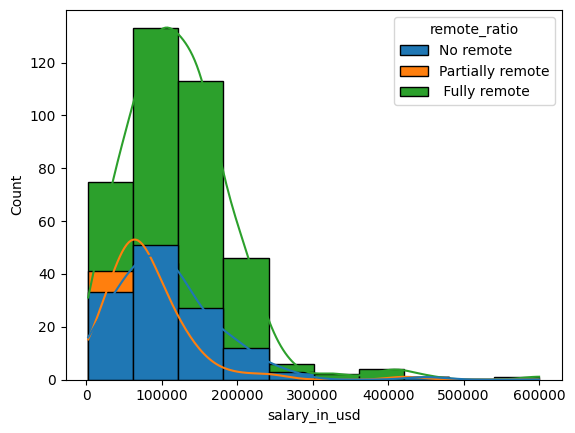

In [83]:
sns.histplot(data,x= "salary_in_usd", alpha = 1,bins=10,hue = "remote_ratio",kde = True)
#g = sns.FacetGrid(data, col = "remote_ratio")

#g.map(sns.histplot, "salary_in_usd", alpha = 1,bins=10)

plt.show()

There is no difference in salaries between them

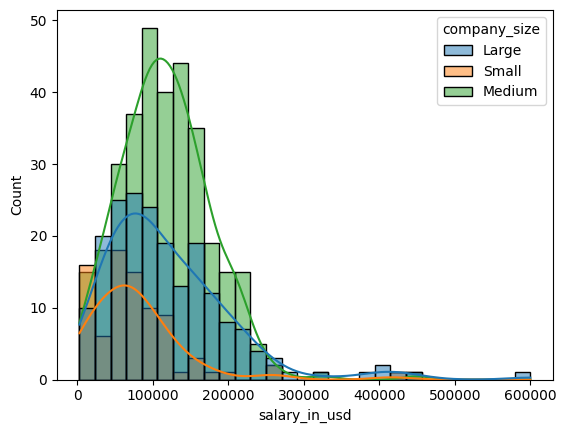

In [85]:
# The relationship between company_size and salary in usd
sns.histplot(data, x='salary_in_usd', hue='company_size',kde = True)
plt.show()

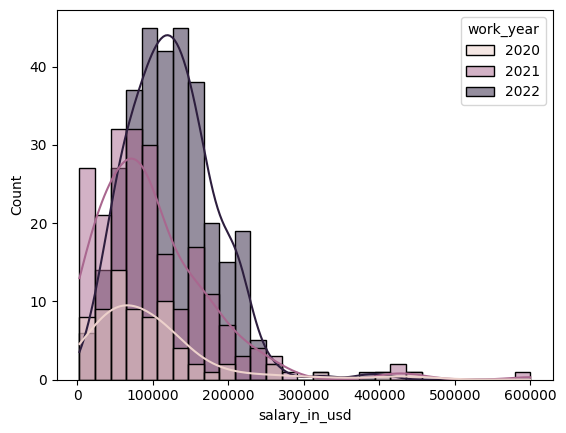

In [87]:
sns.histplot(data, x='salary_in_usd', hue='work_year', kde = True)
plt.show()

In [73]:
perc = data['job_title'].value_counts().head()

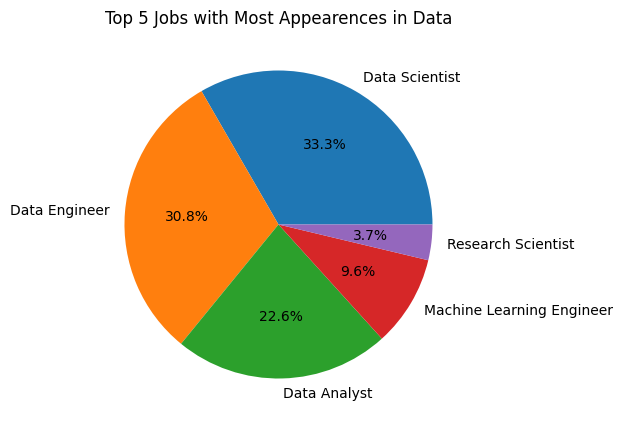

In [84]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('Top 5 Jobs with Most Appearences in Data')
ax.pie(perc, labels=perc.index, autopct='%1.1f%%')
plt.show()

In [75]:
a=data[data['job_title']=="Data Scientist"]['experience_level'].value_counts()
a.sum()

143

** The relationship between data science employees and their experience level **

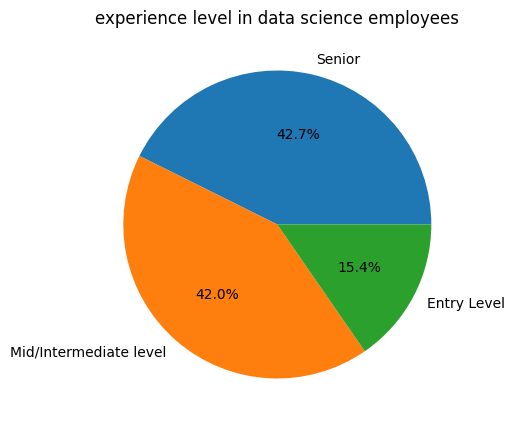

In [76]:
fig, ax = plt.subplots(figsize=(10,5))
plt.title('experience level in data science employees')
ax.pie(a, labels=a.index, autopct='%1.1f%%')
plt.show()

In [77]:
 ds = data[data['job_title']=='Data Scientist']

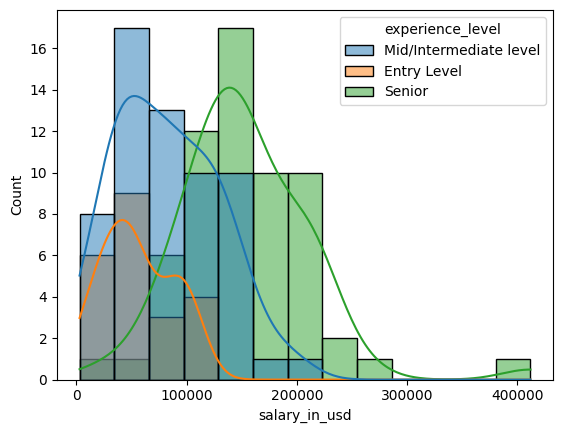

In [78]:
sns.histplot(ds, x='salary_in_usd', hue='experience_level',kde=True)
plt.show()

The employees with the highest salaries in data science are senior-level